# Tweet Sentiment Classifier
<h4>Blake Rayvid - <a href=https://github.com/brayvid>https://github.com/brayvid</a></h4>

# Business problem
<h3><u>Brand reputation management</u></h3>
<h5>Monitor brand perception by correctly classifying new tweets as positive, negative or neutral.</h5>
<ul>
<li>Analyze negative feedback for insights into product weaknesses and use this to drive improvements.
<li>Identify accounts with consistent positive sentiment and offer to collaborate.
<li>Time launches of new products during periods of high positive sentiment.
</ul>


# Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt; plt.rcParams["figure.dpi"] = 144
import seaborn as sns

from string import punctuation
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

from wordcloud import WordCloud

# Dataset
<h4><a href="https://www.kaggle.com/datasets/yasserh/twitter-tweets-sentiment-dataset">https://www.kaggle.com/datasets/yasserh/twitter-tweets-sentiment-dataset</a></h4>
<ul>
<li>three classes: <code>positive</code>, <code>negative</code>, <code>neutral</code> in column called <code>sentiment</code>.
<li>27,000 tweets formatted as strings in <code>text</code> column.
<li>Another column <code>selected_text</code> contains the substring of each tweet relevant to classification.
</ul>


In [ ]:
df = pd.read_csv('Tweets.csv')
df = df.dropna() # only one row is dropped
df.sample(10, random_state=42)[['sentiment','text','selected_text']]

,sentiment,text,selected_text
1589,positive,Enjoy! Family trumps everything,Enjoy! Family trumps everything
10414,negative,--of them kinda turns me off of it all. And ...,kinda turns me off
6562,neutral,Clive it`s my birthday pat me http://apps.fac...,Clive it`s my birthday pat me
2603,positive,congrats hey,congrats
4004,neutral,is texting,is texting
1570,neutral,Do you have any idea when the (not so) patien...,Do you have any idea when the (not so) patient...
27232,neutral,Tell him where...,Tell him where...
8286,negative,"Ooooh, I`m jealous I might try and get some ...",t I have an exam on the monday that Im gonna fail
580,neutral,OHSHNAPSSS. is she pissed at blair as usual ?...,OHSHNAPSSS. is she pissed at blair as usual ? ...
9189,neutral,wee. done with advance audit paper,wee. done with advance audit paper


In [ ]:
sentiments = df['sentiment'].unique()

# Preprocessing
- Transform to lower case
- Remove stop words, listed in ```ignored.csv``` - <a href="https://gist.github.com/brianteachman/4522951">source</a>
- Remove punctuation

In [ ]:
ignored = pd.read_csv('ignored.csv')

In [ ]:
def remove_stop_words(tweet):
  words = pd.DataFrame(data=tweet.lower().replace('`',"'").split(),columns=['orig'])
  words['clean'] = words['orig'].str.strip(punctuation)
  stops_dropped = words[~words['clean'].isin(ignored.iloc[:,0])]['clean']
  return " ".join(stops_dropped)

In [ ]:
df['text_clean'] = df['text'].apply(remove_stop_words)
df['selected_text_clean'] = df['selected_text'].apply(remove_stop_words)

In [ ]:
df.sample(10, random_state=42)[['sentiment','text','text_clean','selected_text_clean']]

,sentiment,text,text_clean,selected_text_clean
1589,positive,Enjoy! Family trumps everything,enjoy family trumps everything,enjoy family trumps everything
10414,negative,--of them kinda turns me off of it all. And ...,kinda turns buy dig deeper hole etc,kinda turns
6562,neutral,Clive it`s my birthday pat me http://apps.fac...,clive birthday pat http://apps.facebook.com/do...,clive birthday pat
2603,positive,congrats hey,congrats hey,congrats
4004,neutral,is texting,texting,texting
1570,neutral,Do you have any idea when the (not so) patien...,idea patient fans will see teaser pics costume,idea patient fans will see teaser pics costume
27232,neutral,Tell him where...,tell,tell
8286,negative,"Ooooh, I`m jealous I might try and get some ...",ooooh jealous might try get saturday exam mond...,t exam monday im gonna fail
580,neutral,OHSHNAPSSS. is she pissed at blair as usual ?...,ohshnapsss pissed blair usual hahah yeeeah b...,ohshnapsss pissed blair usual hahah yeeeah b...
9189,neutral,wee. done with advance audit paper,wee done advance audit paper,wee done advance audit paper


# Model selection

In [ ]:
# Get X (tweets) and y (labels)
labenc = LabelEncoder()
labels = labenc.fit_transform(df['sentiment'])
tweets = df['selected_text_clean']

# Train test split
X_train, X_test, y_train, y_test = train_test_split(tweets, labels, test_size=0.3, random_state=42, stratify=labels)

# Vectorize the tweets
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

## Decision Tree Classifer

Tree depth: 20
Train accuracy: 0.596433770014556
Test accuracy: 0.5750849102377487
Classification Report:
               precision    recall  f1-score   support

     neutral       0.87      0.17      0.28      2334
    negative       0.49      0.96      0.65      3335
    positive       0.88      0.44      0.59      2575

    accuracy                           0.58      8244
   macro avg       0.75      0.52      0.51      8244
weighted avg       0.72      0.58      0.53      8244



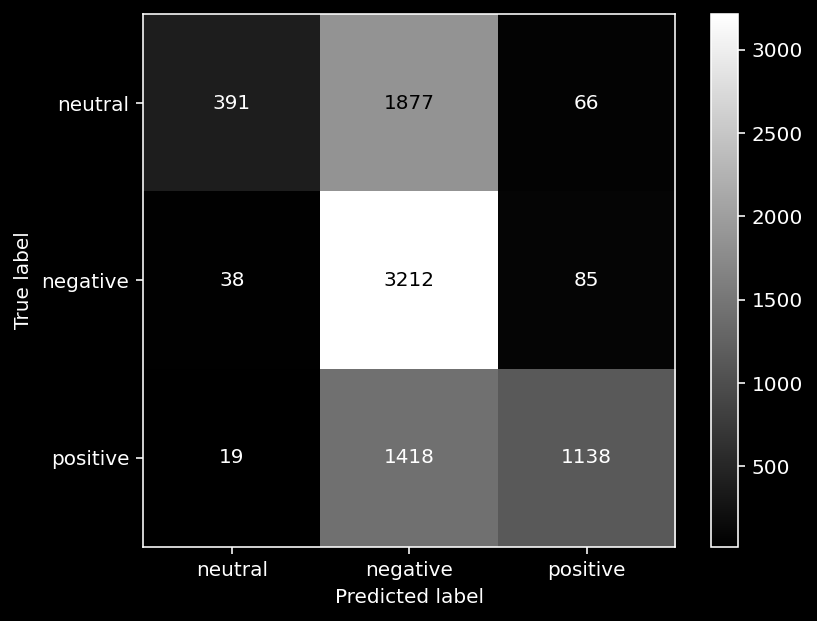

In [ ]:
# Fit Decision Tree
clf = DecisionTreeClassifier(max_depth=20)
clf.fit(X_train_vec, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test_vec)
print("Train accuracy:", clf.score(X_train_vec,y_train))
print("Test accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=sentiments))

# Plot confusion matrix
plt.style.use("dark_background")
ConfusionMatrixDisplay.from_estimator(clf, X_test_vec, y_test, display_labels=sentiments, cmap='gray')
plt.show()

## Random Forest Classifier

Train accuracy: 0.6469640257849865
Test accuracy: 0.6305191654536633
Classification Report:
               precision    recall  f1-score   support

     neutral       0.93      0.27      0.41      2334
    negative       0.53      0.97      0.69      3335
    positive       0.91      0.52      0.66      2575

    accuracy                           0.63      8244
   macro avg       0.79      0.59      0.59      8244
weighted avg       0.76      0.63      0.60      8244



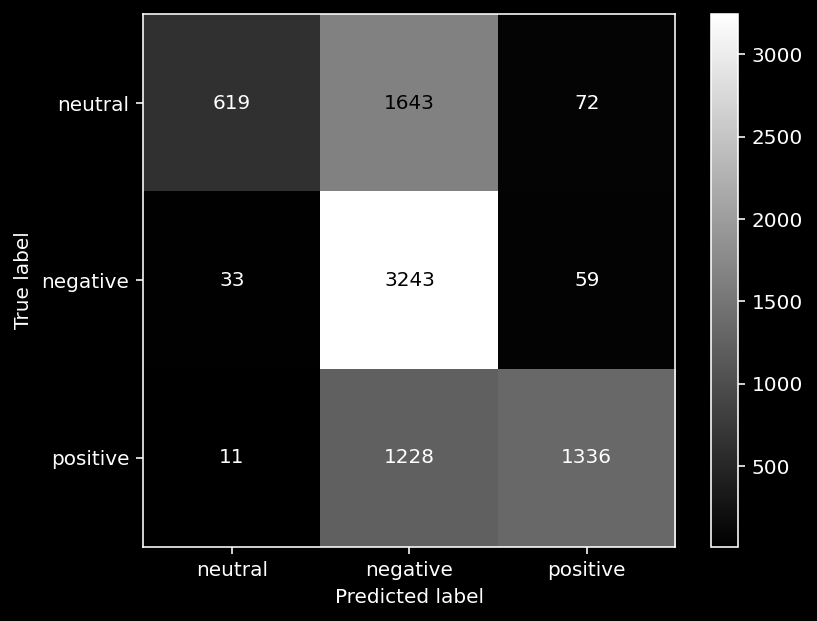

In [ ]:
# Fit Random Forest Classifier
rfc = RandomForestClassifier(max_depth=20)
rfc.fit(X_train_vec, y_train)

# Predict and evaluate
y_pred = rfc.predict(X_test_vec)
print("Train accuracy:", rfc.score(X_train_vec,y_train))
print("Test accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=sentiments))

# Plot confusion matrix
plt.style.use("dark_background")
ConfusionMatrixDisplay.from_estimator(rfc, X_test_vec, y_test, display_labels=sentiments, cmap='gray')
plt.show()

## Naive Bayes Classifier

Train accuracy: 0.8649407361197754
Test accuracy: 0.7817806889859291
Classification Report:
               precision    recall  f1-score   support

     neutral       0.90      0.59      0.71      2334
    negative       0.69      0.93      0.79      3335
    positive       0.89      0.76      0.82      2575

    accuracy                           0.78      8244
   macro avg       0.83      0.76      0.78      8244
weighted avg       0.81      0.78      0.78      8244



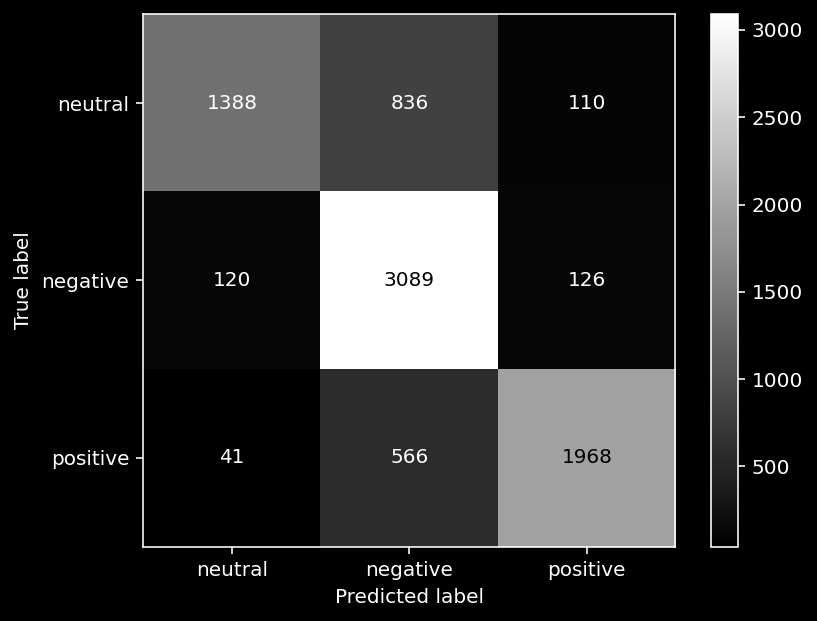

In [ ]:
# Fit Naive Bayes classifier
est = MultinomialNB()
est.fit(X_train_vec, y_train)

# Predict and evaluate
y_pred = est.predict(X_test_vec)
print("Train accuracy:", est.score(X_train_vec,y_train))
print("Test accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=sentiments))

# Plot confusion matrix
plt.style.use("dark_background")
ConfusionMatrixDisplay.from_estimator(est, X_test_vec, y_test, display_labels=sentiments, cmap='gray')
plt.show()

## Support Vector Classifier ⭐️

Train accuracy: 0.950093574547723
Test accuracy: 0.8087093643862203
Classification Report:
               precision    recall  f1-score   support

     neutral       0.82      0.72      0.77      2334
    negative       0.75      0.89      0.82      3335
    positive       0.89      0.78      0.83      2575

    accuracy                           0.81      8244
   macro avg       0.82      0.80      0.81      8244
weighted avg       0.82      0.81      0.81      8244



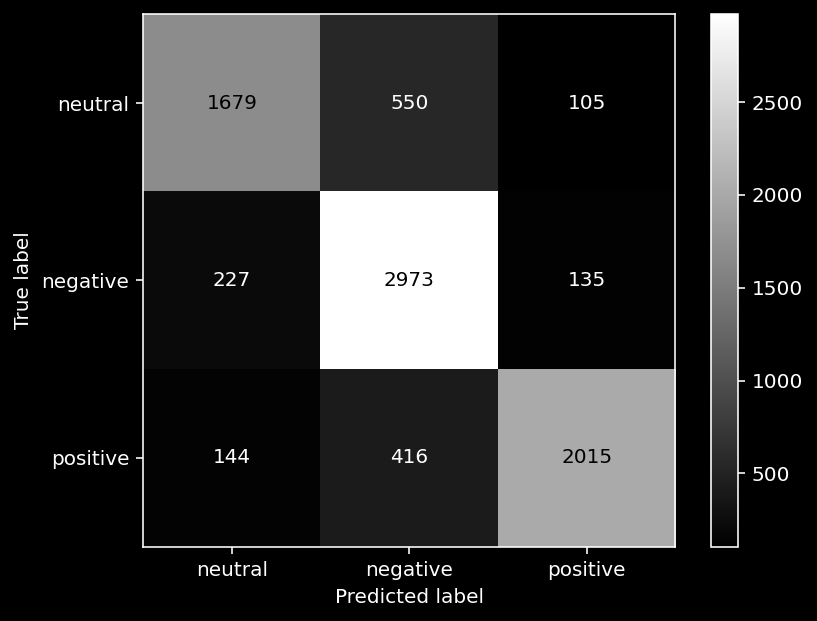

In [ ]:
# Fit Support Vector Classifier (slow)
est = SVC()
est.fit(X_train_vec, y_train)

# Predict and evaluate
y_pred = est.predict(X_test_vec)
print("Train accuracy:", est.score(X_train_vec,y_train))
print("Test accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=sentiments))

# Plot confusion matrix
plt.style.use("dark_background")
ConfusionMatrixDisplay.from_estimator(est, X_test_vec, y_test, display_labels=sentiments, cmap='gray')
plt.show()

### Cross validation tuning

In [ ]:
def cross_validation_svc(X_train, y_train, k, num_split = 10):

    X_train = X_train.values
    # y_train = y_train.values

    score_train_list = []
    score_val_list = []

    for train_index, valid_index in KFold(n_splits = num_split).split(X_train):

        # train and validation splitting
        X_train_fold, X_val_fold = X_train[train_index], X_train[valid_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[valid_index]

        # vectorize the data
        vectorizer = TfidfVectorizer()
        X_train_fold_vec = vectorizer.fit_transform(X_train_fold)
        X_val_fold_vec = vectorizer.transform(X_val_fold)

        # fit SVC
        clf = SVC(gamma = k)
        clf.fit(X_train_fold_vec, y_train_fold)

        # save metrics
        accuracy_train = clf.score(X_train_fold_vec, y_train_fold)
        accuracy_val = clf.score(X_val_fold_vec, y_val_fold)
        score_val_list.append(accuracy_val)
        score_train_list.append(accuracy_train)

    return {'k': k, 'train': np.mean(score_train_list), 'validation': np.mean(score_val_list)}

In [ ]:
# Slow - append results for each value of k
crossval_list = [pd.Series(cross_validation_svc(X_train, y_train, k, 5)) for k in (np.logspace(-1, 2, 4)).astype(int)]
cross_val_df = pd.concat(crossval_list, axis = 1).T

# Plot cross validation results
fig, ax = plt.subplots()
sns.lineplot(x = 'k', y = 'train',
             data = cross_val_df,
             ax = ax, label = 'train')
sns.lineplot(x = 'k', y = 'validation',
             data = cross_val_df,
             ax = ax, label = 'validation')
ax.set_ylabel('Accuracy')
ax.set_title('5-fold CV tuning of SVC')
ax.set_xlabel('Gamma')
plt.show()

# Model comparison
<table>
<tr>
<th>Model
<th>Train Acc
<th>Test Acc
<th>Best
</tr>
<tr>
<td>Decision Tree
<td>0.59
<td>0.57
<td>
</tr>
<tr>
<td>Random Forest
<td>0.64
<td>0.63
<td>
</tr>
<tr>
<td>Naive Bayes
<td>0.86
<td>0.78
<td>
</tr>
<tr>
<td>SVC
<td>0.95
<td>0.80
<td>⭐️
</tr>
</table>



# Visualizations

## Most tweeted words
Generate a word cloud of top words from positive tweets and one from negative tweets. Size of word indicates in how many tweets the word appeared.

In [ ]:
top_words = pd.Series(np.concatenate([x.split() for x in df['selected_text_clean']])).value_counts()
top_words.head(20)

good      1251
day       1058
love       909
happy      852
like       774
get        772
now        770
go         700
work       612
going      592
today      564
got        559
one        538
time       535
thanks     532
lol        528
really     520
u          519
miss       519
know       491
Name: count, dtype: int64

In [ ]:
top_words_top = top_words[:1000]
top_labeled = {}

# SLOW - Count how many positive, negative, neutral tweets each top word appears in
for word, freq in top_words_top.items():
  top_labeled[word] = [0,0,0] # pos neg neut
  for tweet, label in zip(df['selected_text_clean'],df['sentiment']):
    if word in tweet:
      if label == 'positive':
        top_labeled[word][0] += 1
      elif label == 'negative':
        top_labeled[word][1] += 1
      else:
        top_labeled[word][2] += 1

# Label each word the class corresponding to the highest number in top_labeled[word]
for word, counts in top_labeled.items():
  if counts[0] >= counts[1] and counts[0] >= counts[2]:
    top_labeled[word] = [counts, 'positive']
  elif counts[1] >= counts[0] and counts[1] >= counts[2]:
    top_labeled[word] = [counts, 'negative']
  else:
    top_labeled[word] = [counts, 'neutral']

In [ ]:
# Generate dict like top_words_top but one for each class
top_pos_freq = {}
top_neg_freq = {}
top_neut_freq = {}

for key, val in top_labeled.items():
  if val[1] == 'positive':
    top_pos_freq[key] = top_words_top[key]
  elif val[1] == 'negative':
    top_neg_freq[key] = top_words_top[key]
  else:
    top_neut_freq[key] = top_words_top[key]

In [ ]:
def plot_word_cloud_dict_colormapped(d, color_fun, title):
  plt.style.use("dark_background")
  wordcloud = WordCloud(collocations=False,width=1600, height=800, prefer_horizontal=1).generate_from_frequencies(d)
  wordcloud.recolor(color_func=color_fun)
  # Plot the wordcloud image
  plt.figure(figsize=(14,10))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.title(title)
  plt.show()

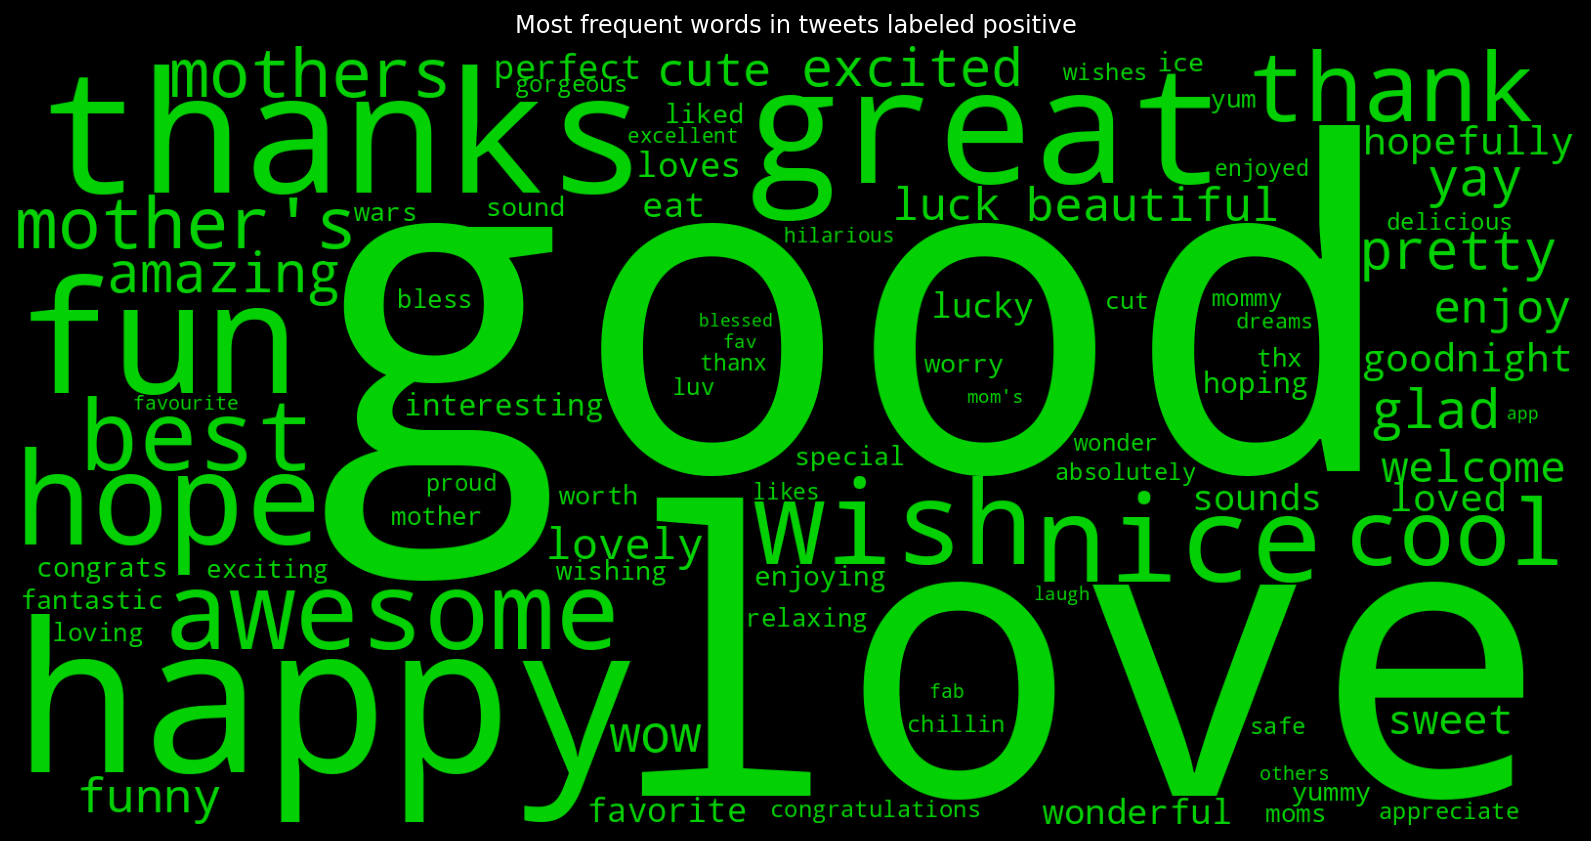

In [ ]:
# Generate the positive wordcloud in green
color_func_1 = lambda **kwargs: "#04d104"

plot_word_cloud_dict_colormapped(top_pos_freq, color_func_1, 'Most frequent words in tweets labeled positive')

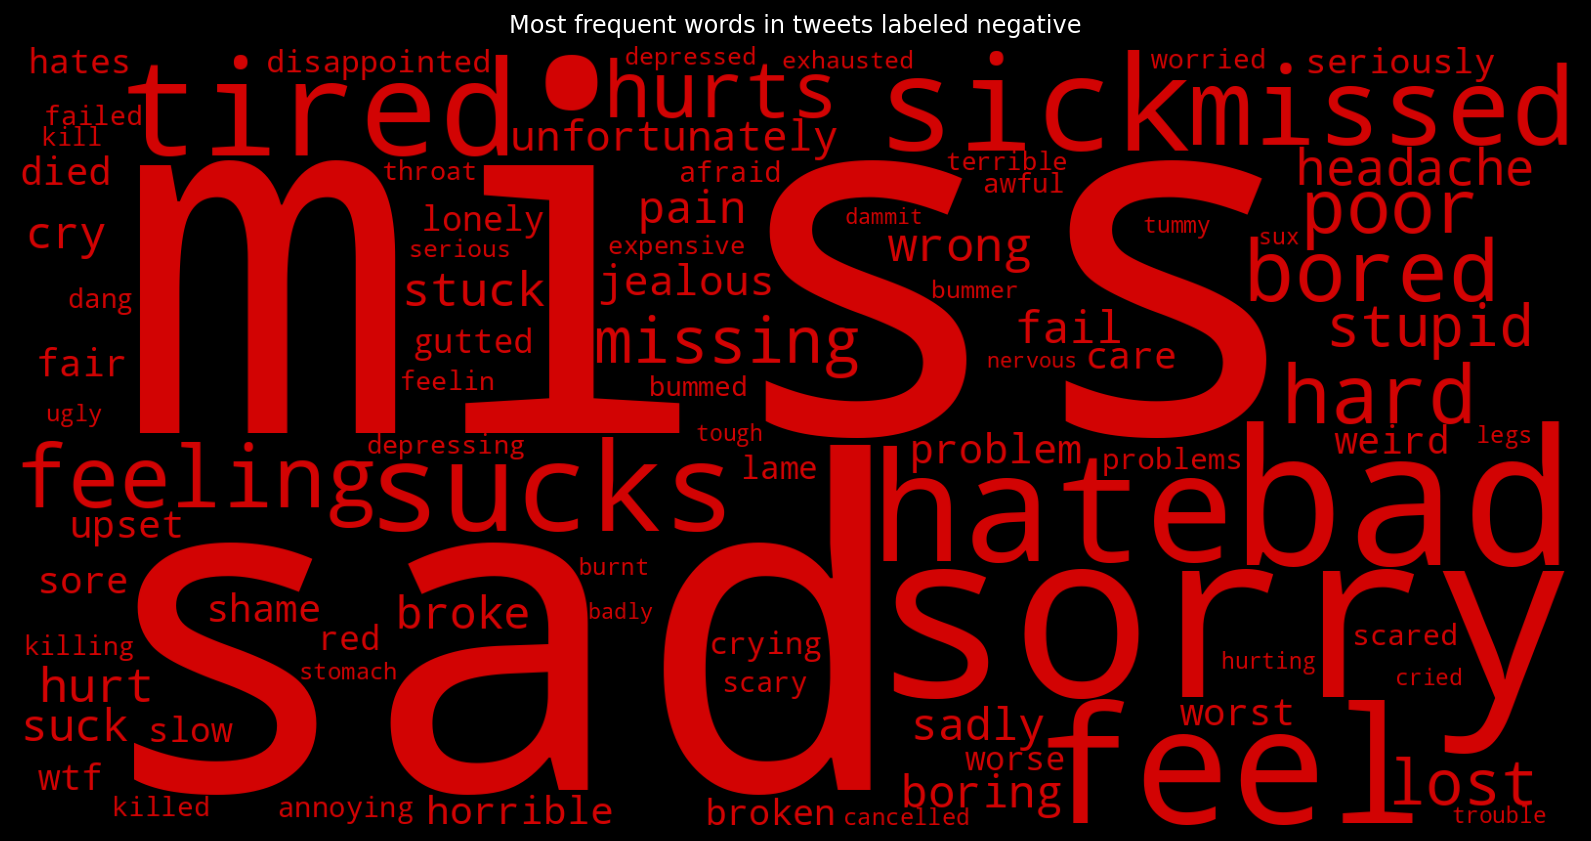

In [ ]:
# Generate the negative wordcloud in red
color_func_2 = lambda **kwargs: "#d20303"

plot_word_cloud_dict_colormapped(top_neg_freq, color_func_2, 'Most frequent words in tweets labeled negative')

## Sentiment proportions

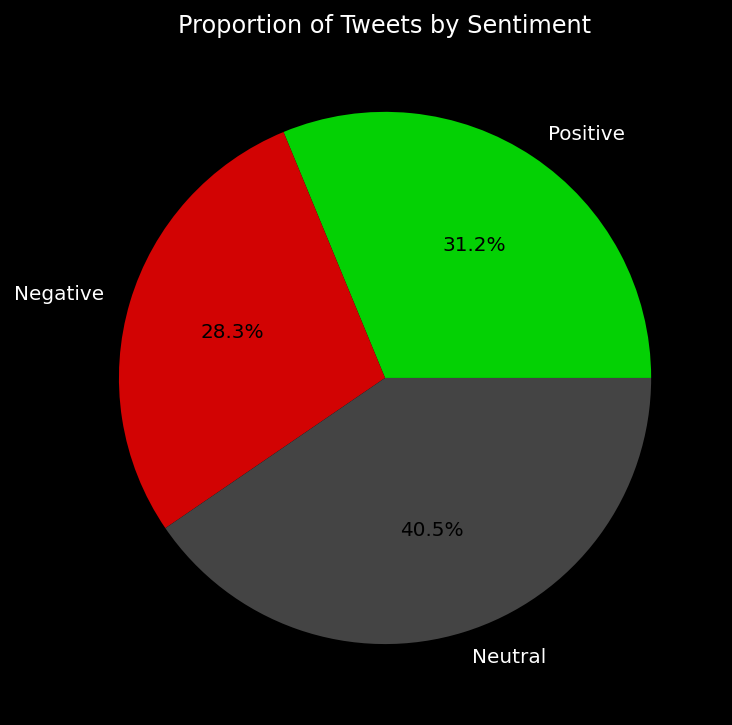

In [ ]:
# Pie chart - proportions of sentiment
used_percent = []
cats = ['positive', 'negative','neutral']
for x in cats:
  used_percent.append(100*len(df[df['sentiment'] == x])/len(df))
plt.style.use("dark_background")
plt.figure(figsize=(6,6))

def func(pct):
    return f"{pct:.1f}%"

# https://stackoverflow.com/questions/27898830/python-how-to-change-autopct-text-color-to-be-white-in-a-pie-chart
_, _, autotexts = plt.pie(labels=['Positive','Negative','Neutral'],x=used_percent, autopct=func, colors=['#04d104','#d20303','#444444'])
for autotext in autotexts:
    autotext.set_color('black')

plt.title('Proportion of Tweets by Sentiment')
plt.show()

# Next steps
- Try Word2Vec semantic embedding instead of frequency-based TF-IDF.
- Investigate dimensionality reduction with UMAP or t-SNE.
- Deploy to a web service to classify new tweets in real time.